<a href="https://colab.research.google.com/github/FranciscoMoralesActuary/Seguros-de-Auto/blob/main/seminario_curricular.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **Código elaborado por Morales Ramírez Ángel Franciso [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)**
---

 Fuente de los datos [Aseguradora de autos](https://www.kaggle.com/datasets/ifteshanajnin/carinsuranceclaimprediction-classification?select=sample_submission.csv)

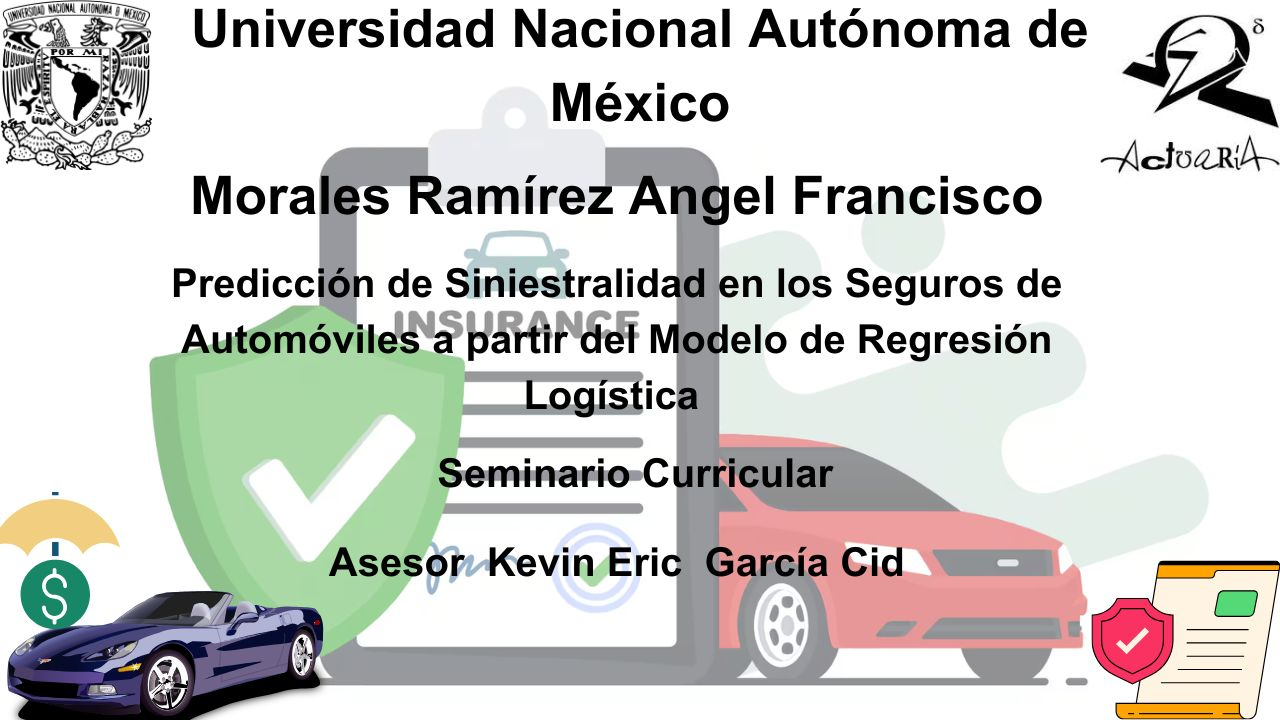

---
# **Predicción de siniestralidad en los seguros de autos usando un modelo de regresión logística** 🏎️
---

---
# **Importación de librerías**🐍
---

In [ ]:
#Impor libreria pandas
#Trabajar los datos con dataframes
import pandas as pd
#Importar libreria numpy
#Cálculos matemáticos
import numpy as np
#Importar libreria seaborn
#Gráficos
import seaborn as sns
#Importar libreria matplotlib
#Gráficos
import matplotlib.pyplot as plt
#Importar libreria statsmodels
#Regresión logística
import statsmodels as sm
#Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
#Modelo de regresión logística
from sklearn.linear_model import LogisticRegression
#Calcular curva ROC
from sklearn.metrics import roc_curve

---
# **Importación de datos**📋
---

In [ ]:
#Dirrección del repositorio con los datos
url_datos=('https://raw.githubusercontent.com/FranciscoMoralesActuary/Seguros-de-Auto/main/datos-aseguradora.xlsx')
#Leer el archico con la funcion de Pandas pd.read
df = pd.read_excel(url_datos)

In [ ]:
# Configuración de Pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

#Mostrar las primeras 5 filas del dataset
df.head(5)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,515873589958172,5,644230769230769,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,672618513547733,2,375,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,841110255796233,2,384615384615385,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,900276558749967,11,432692307692308,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,48,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,596402813108729,11,634615384615385,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [ ]:
#Mostrar dimensiones de la base de datos
df.shape

(58592, 44)

---
# **Descripción de variables** 🗃️
---

Se agrega una breve descripción del dataset con el nombre , tipo y descripcion de cada variable

1.	**policy id**: Identificador único del contrato póliza
2.	**policy ternure**: Plazo de la póliza
3.	**age of car**: Edad del auto en años
4.	**age of policyholder**: Edad del asegurado en años
5.	**area cluster**: Clasificación del area donde vive el asegurado
6.	**population density**: Densidad de población de la ciudad del asegurado
7.	**make**: Fabricante del vehículo
8.	**segment**: Segmento del coche
9.	**model**: Nombre del modelo del auto
10.	**fuel type**: Tipo de combustible que utiliza el auto
11.	**max torque**: Torque máximo generado por el auto (Nm@rpm)
12.	**max power**: Potencia máxima generado por el auto (bhp@rpm)
13.	**engine type**: Tipo de motor utilizado por el auto
14.	**airbags**: Numero de bolsas de aire en el auto
15.	**is esc**: Valor booleano que indica si el auto cuanto con ESC (Control electrónico de estabilidad)
16.	**is adjustable steering**: Valor booleano que indica el auto cuenta con volante ajustable
17.	**is tpms**: Valor booleano que indica el automóvil cuenta con TPMS (Sistema de monitore de presión de neumáticos)
18.**is parking sensors**: Valor booleano que indica si el carro cuenta con sensores de estacionamiento
19.	**is parking camera**: Valor booleano que indica el auto cuante con cámara de estacionamiento
20.	**rear brakes type**: Tipo de frenos en la parte trasera del auto
21.	**displacement**: Cilindrada del motor del auto
22.	**cylinder**: Numero de cilindros presentes en el motor del auto
23.	**transmission type**: Tipo de transmisión del auto
24.	**gear box**: Numero de marchas / velocidades en el auto
25.	**steering type**: Tipo de dirección asistida en el auto
26.	**turning radius**: El espacio que necesita el auto para realizar un giro (metros)
27.	**length**: Longitud del auto (milímetros)
28.	**width**: Ancho del auto (milímetros)
29.	**height**: Altura del auto (milímetros)
30.	**gross weight**: Peso máximo permitido en el auto completamente cargado, es decir, incluido
pasajeros, carga y equipamiento (Kg)
31.	**is front fog lights**: Valor booleano que indica si el auto tiene luces antiniebla delanteras
32.	**is rear window wiper**: Valor booleano que indica si el auto tiene limpiaparabrisas trasero
33.	**is rear window washer**: Valor booleano que indica si el auto tiene lava parabrisas trasero
34.	**is rear window defogger**: Valor booleano que indica si el auto tiene desempañador de la
ventana trasera
35.	**is bake assist**: Valor booleano que indica si el auto tiene la función de asistencia de frenado
36.	**is power door lock**: Valor booleano que indica si el auto tiene cerradura eléctrica
37.	**is central locking**: Valor booleano que indica si el auto tiene función de cierre centralizado
38.	**is power steering**: Valor booleano que indica si el auto tiene dirección asistida
39.	**is driver seat height adjustable**: Valor booleano que indica si el auto tiene altura de
asiento ajustable
40.	**is day night rear view mirror**: Valor booleano que indica si el auto tiene el espejo retrovisor
diurno y nocturno
41.	**is ecw**: Valor booleano que indica si el auto tiene advertencia de verificación del motor
(Engine Check Warning)
42.	**is speed alert**: Valor booleano que indica si el auto tiene sistema de alerta de velocidad
43.	**ncap rating**: Calificación de seguridad otorgada por NCAP
44.	**is claim**: Valor booleano que indica si el asegurado sufrió un siniestro



In [ ]:
#Mostrar la infomación de las columas datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   policy_id                         58592 non-null  object
 1   policy_tenure                     58592 non-null  int64 
 2   age_of_car                        58592 non-null  int64 
 3   age_of_policyholder               58592 non-null  int64 
 4   area_cluster                      58592 non-null  object
 5   population_density                58592 non-null  int64 
 6   make                              58592 non-null  int64 
 7   segment                           58592 non-null  object
 8   model                             58592 non-null  object
 9   fuel_type                         58592 non-null  object
 10  max_torque                        58592 non-null  object
 11  max_power                         58592 non-null  object
 12  engine_type       

In [ ]:
# Cantidad de valores nulos por columna
df.isnull().sum()

,0
policy_id,0
policy_tenure,0
age_of_car,0
age_of_policyholder,0
area_cluster,0
population_density,0
make,0
segment,0
model,0
fuel_type,0


In [ ]:
# Cantidad de valores nulos en todo el dataframe
df.isnull().sum().sum()

np.int64(0)

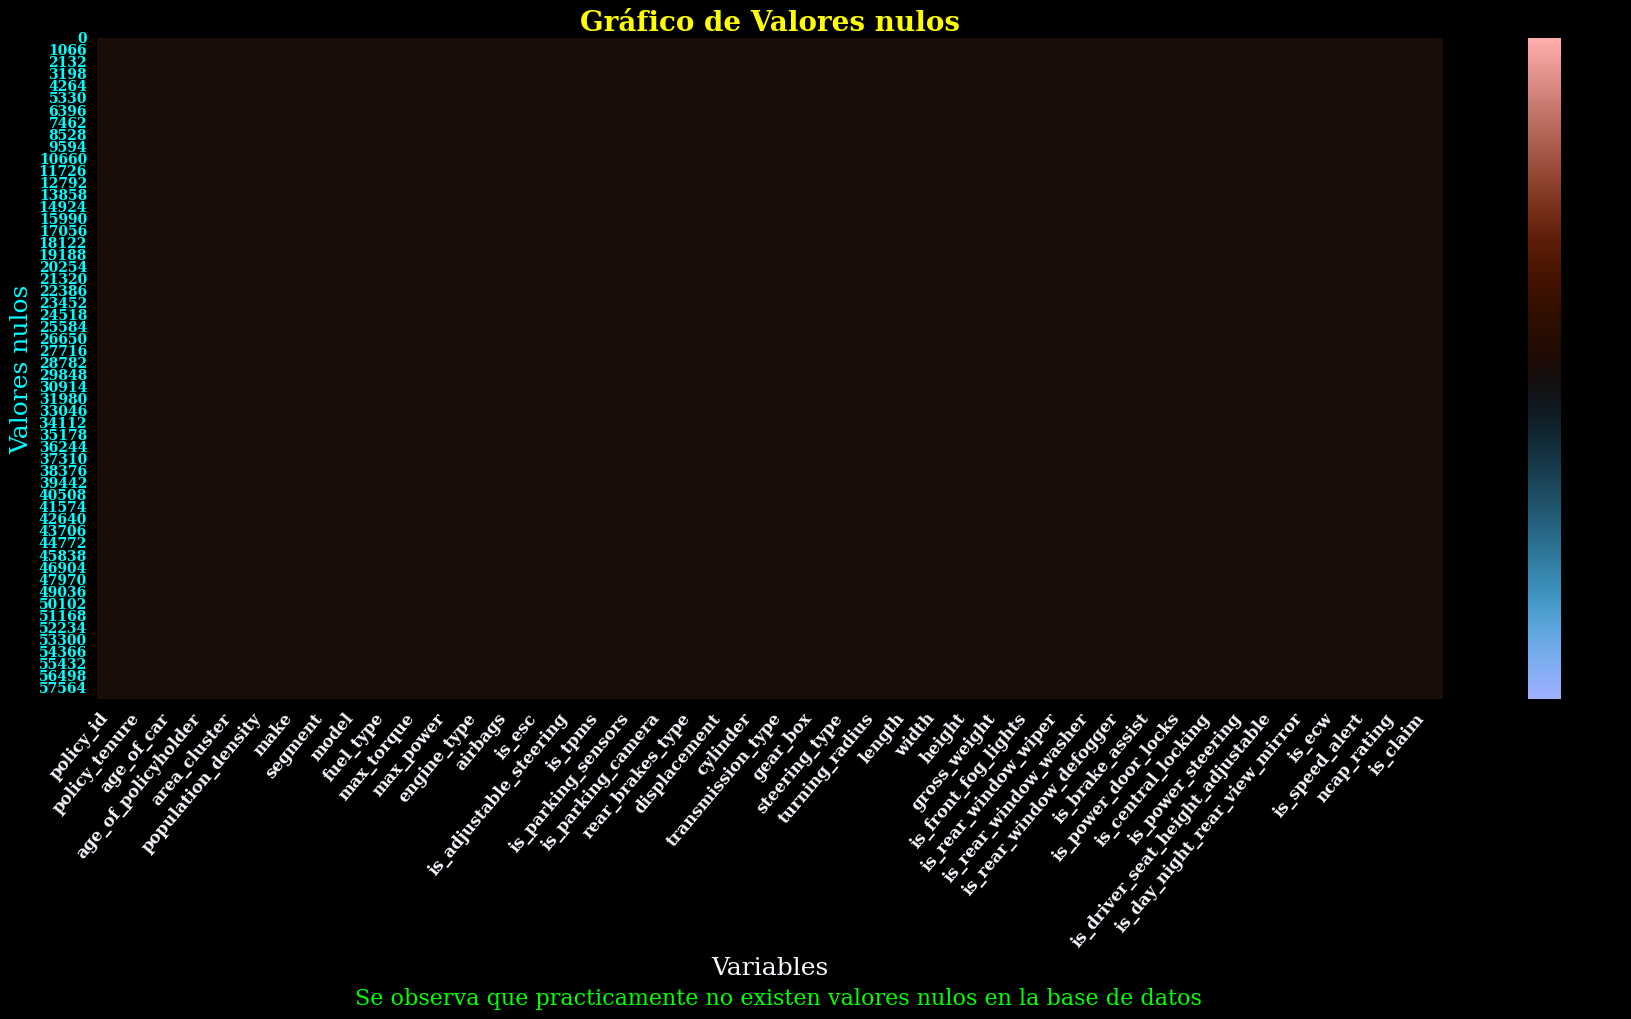

In [ ]:
#Gráfico para visualizar los valores nulos que hay en el dataset
#facecolor-->Color  de fondo
#figsize-->Tamaño del gráfico
plt.figure(figsize=(18,10), facecolor='black')
#Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
#Grafico para ver la proporción de valores nulos
sns.heatmap(df.isnull(), cmap='berlin')
# Agregr título
#fontweight='bold'-->Negritas
plt.title('Gráfico de Valores nulos',
          fontsize=20, color='yellow', fontweight='bold')
#Agregar etiquetas de los valores del eje X
plt.xticks(fontsize=12, color='ghostwhite',
           rotation=50, ha='right',fontweight='bold')
plt.yticks(fontsize=10, color='cyan', fontweight='bold')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Variables',fontsize = 18, color = 'ghostwhite')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Valores nulos',fontsize = 18, color = 'cyan')
#Agregar la interpretacion de la grafica
plt.figtext(0.2, -0.01, "Se observa que practicamente no existen valores nulos "
            "en la base de datos",
            fontsize = 16, color='lime')
# Mostrar  gráfico
plt.tight_layout()
plt.show()

---
##**Definición de la variable objetivo (variable Y)**🚗💨
---

La variable objetivo es $Y=$ "is_claim" lo que se traduce como "es_reclamación" y se refiere a si el asegurado realizo una reclamación durante la vigencia de su póliza.

Esta variable es de vital importancia para la industria de los seguros en México, representa el riesgo que implica asegurar a un individuo o vehículo determinado,  una predicción correcta implica menos pérdidas económicas para la aseguradora


El evento que buscamos predecir es la probabilidad es que un auto sufra un siniestro, tiene una respuesta binaria (Si o no)

$$
Y= \begin{cases} 1 \ \text{Si el auto sufrió un siniestro} \\
   0 \ \text{Si el auto no sufrió un siniestro}
  \end{cases}
$$

In [ ]:
#Variable Target
Y = df['is_claim']
Y

,is_claim
0,0
1,0
2,0
3,0
4,0
...,...
58587,0
58588,0
58589,0
58590,0


In [ ]:
# Cuenta la cantidad de personas que sufrieron un siniestro (1) y las que no sufrieron un siniestro (0)
df['is_claim'].value_counts()

,count
is_claim,
0,54844
1,3748


<ipython-input-22-508d4ba696a2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafica=sns.countplot(x='is_claim',data=df,palette=colors,edgecolor='white')


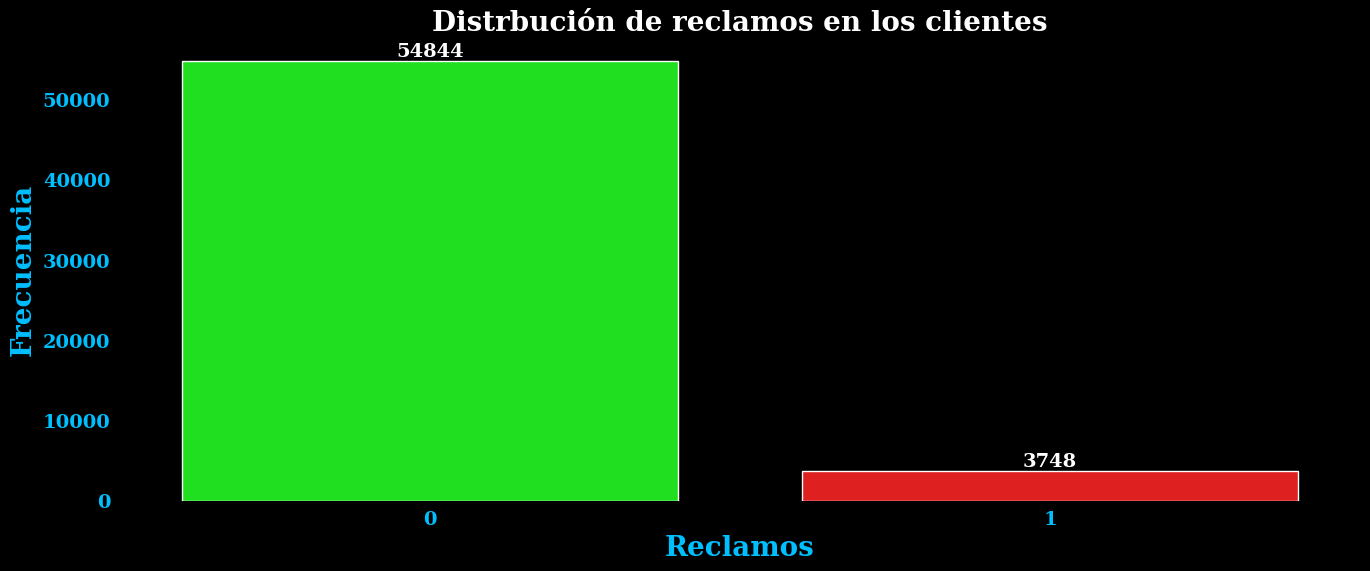

In [ ]:
#Crear gráfico
#figsize--> Tamaño
#facecolor--> Color de fondo
plt.figure(figsize=(16,6), facecolor="black")
#Tipo de letra
plt.rcParams['font.family'] = 'DejaVu Serif'
#Revisamos la proporción de reclamos
#x-->Variable a graficar
#data-->Dattos
#color-->Color de las barras
#edgecolor-->Color del borde de las barras
# Creamos una paleta de colores
colors = ['lime', 'red']
#Width-->Grosor de barras
grafica=sns.countplot(x='is_claim',data=df,palette=colors,edgecolor='white')
# Agregar etiquetas en el eje x, con tamaño y color personalizado
plt.xlabel('Reclamos',fontsize = 20,
           color = 'deepskyblue',fontweight='bold')
# Agregar etiquetas en el eje y, con tamaño  y color personalizado
plt.ylabel('Frecuencia',fontsize = 20,
           color = 'deepskyblue',fontweight='bold')
#Agregar las etiquetas de los valores del eje x & y
plt.xticks(fontsize=14, color='deepskyblue',fontweight='bold')
plt.yticks(fontsize=14, color='deepskyblue',fontweight='bold')
#Agregar el titulo con tamaño y color personalizados
#fontweight='bold'-->Negritas
plt.title('Distrbución de reclamos en los clientes',fontsize = 20,
          color = 'white',fontweight='bold')
#Etiquetas para escribir los reclamos exactos
#container-->Almacena el valor de cada variable x
for container in grafica.containers:
    grafica.bar_label(container, fontsize=14,
                      color='white',fontweight='bold')
# facecolor --> Color  de fondo
grafica.set_facecolor("black")
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)
# Mostrar el gráfico
plt.show()

---
# **Limpieza de datos**🧼
---

---
## **Clasificación de variables**🚓
---

In [ ]:
#0)Dataframe de variables insignificantes
#Variables insignifcantes
#No seran tomadas en cuenta a la hora de hacer el modelo
#Definimos el dataset df_i
df_i=df[['policy_id','policy_tenure']]
#Mostramos las 5 primeras filas
df_i.head(5)

,policy_id,policy_tenure
0,ID00001,515873589958172
1,ID00002,672618513547733
2,ID00003,841110255796233
3,ID00004,900276558749967
4,ID00005,596402813108729


In [ ]:
#1)Dataframe de ciudad
#Variables sobre la ciudad
#dataframe df_ci:=Columnas referentes a la imformación
#sobre la ciudad donde recide el asegurado
df_ci=df[['area_cluster','population_density',]]
#Mostrar las 5 primeras filas de dataframe
df_ci.head(5)

,area_cluster,population_density
0,C1,4990
1,C2,27003
2,C3,4076
3,C4,21622
4,C5,34738


In [ ]:
#2)Dataframe sobre el asegurado
#Variables sobre el asegurado
#dataframe df_a:=Columnas que tienen información acerca del asegurado
df_a=df[['age_of_policyholder']]
#Mostrar las 5 primeras filas del dato
df_a.head(5)

,age_of_policyholder
0,644230769230769
1,375
2,384615384615385
3,432692307692308
4,634615384615385


In [ ]:
#3)Dataframe sobre el carro
#Variables sobre el carro
#df_c= Columnas que tienen información significada sobre el carro
df_c=df[['age_of_car','make','segment','model','fuel_type','max_torque',
         'max_power','engine_type','airbags', 'is_esc',
         'is_adjustable_steering','is_tpms','is_parking_sensors',
         'is_parking_camera','rear_brakes_type','displacement','cylinder',
         'transmission_type','gear_box','steering_type','turning_radius',
         'length','width','height','gross_weight','is_front_fog_lights',
         'is_rear_window_wiper','is_rear_window_washer',
         'is_rear_window_defogger','is_brake_assist',
         'is_power_door_locks','is_central_locking','is_power_steering',
         'is_driver_seat_height_adjustable','is_day_night_rear_view_mirror',
         'is_ecw','is_speed_alert','ncap_rating'

         ]]
#Mostrar las 5 primeras filas
df_c.head(5)

,age_of_car,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,5,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
2,2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
3,11,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,48,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
4,11,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2


---
## **Valores Nulos**🛠️
---

Representados por pandas como NaN (Not at Number) los **valores nulos** representan datos faltantes o indefinidos y requieren un manejo adecuado para evitar problemas en el análisis.

**¿Cómo Tratar los Valores Nulos?** Tenemos las siguientes opciones

1.   **Eliminar Filas** Se eliminan las filas con valores nulos, sin embargo, puede generar una perdida significativa de información por eso es lo solo recomendable si la cantidad de valores nulos es una cifra pequeña $ \approx 5 \%  $
2.   **Eliminar Columnas** Se elimina toda la columna cuando la cantidad de valores nulos es muy alta $ >70\% $
1.   **Imputación** Se remplazan los valores nulos con una medida de tendencia central: media, mediana o moda



In [ ]:
# Cantidad de valores nulos que tenemos por columna
df_c.isnull().sum()
#No es necesario tratar los valores nulos por que no existen

,0
age_of_car,0
make,0
segment,0
model,0
fuel_type,0
max_torque,0
max_power,0
engine_type,0
airbags,0
is_esc,0


In [ ]:
# Cantidad de valores nulos que tenemos
df_c.isnull().sum().sum()
#No es necesario tratar los valores nulos por que no existen

np.int64(0)

---
## **Outliners**🚨
---

Un **valor atípico (outliner)** es un valor de datos que se desvía significativamente del resto de los valores, es decir, una observación con un valor mucho más grande o pequeño que el resto de los valores en el conjunto de datos

Los outliners influyen a que los modelos de regresión no generalicen bien y tengan conclusiones erróneas por eso deben de ser tratados en el conjunto de datos

**¿Cómo identificar outliners?**

1. **Visualización de datos** Se grafica el diagrama de caja de la variable a analizar y en qué caso de existen valores atípicos muy grandes se visualizaran de manera clara como puntos fuera del rango
2.   **Rango IQR** También conocido como rango intercuartílico se trata toman $Q_1$ (Percentil $0.25$) y $Q_3$ (Percentil $0.75$)  y todo valor fuera del intervalo $[Q_1-1.5*IQR,Q_3+1.5*IQR]$ se considera outliner
1.   **Z-Score** Mide las desviaciones estándar de un punto respecto a la media y considera outliners a aquellos que tienen un valor de $|Z|>3$


**¿Cómo tratar los outliners?** Se tienen las siguientes opciones

1.   **Eliminar Valores** Si lo valores atípicos no aportan información útil la mejor opción es optar por eliminarlos  
2.   **Transformarlos** Se aplica una operación a los datos como logaritmos o raíz cuadrada para reducir el impacto de los outliners
1.   **Imputación** Se tratan como valores nulos y se remplazan con una medida de tendencia central: media, mediana o moda
1.   **Modelos robustos** Son modelos que manejan outliners sin verse gravemente afectados

**0)Dataframe de variables insignificantes** No es necesario tratar sus outliners por que no se ocuparán estos datos

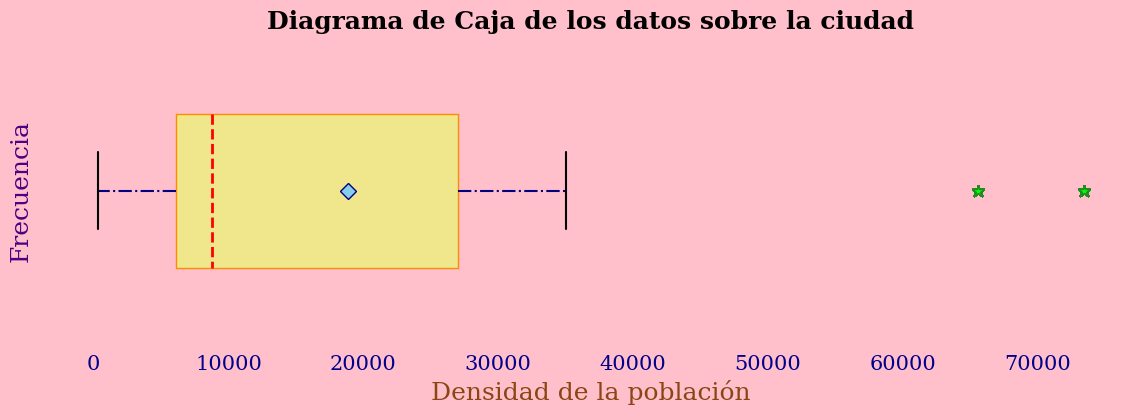

In [ ]:
#1)Dataframe de ciudad
# Creaamos la figura y ajustar el tamaño
# facecolor--> color  de fondo
plt.figure(figsize=(14,4), facecolor='pink')
#Ajustamos el estilo del gráfico
sns.set_style("white")
#plt.rcParams['font.family']-->Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Creamos el diagrama de caja
#datos=df_ci--> datos para hacer el diagrama
#x='population_density'-->variable sobre la que se hace el diagrama de caja
#dict(facecolor='red', color='khaki'), -->  color de la caja
#whiskerprops=dict(color='navy'),--> Lineas horizontales
#capprops=dict(color='black'),--> Lineas verticales
#flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
#width=0.5 -->Largo de la caja
#showmeans=True-->Muestra la media
#medianprops=dict(color='red')--> Mediana
#meanprops=dict(marker='D', markersize=8,)-->Media
grafica= sns.boxplot(data=df_ci, x='population_density',showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
#Lineas verticales
            whiskerprops=dict(color='navy',linewidth=1.5,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='black',linewidth=1.5,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=8,
                           markerfacecolor='skyblue', markeredgecolor='navy')
            )
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)

# facecolor-->' color  de fondo
grafica.set_facecolor('pink')
# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Diagrama de Caja de los datos sobre la ciudad',
          fontsize=18, color='black', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=15, color='darkblue')
# Etiquetamos los ejes
plt.xlabel('Densidad de la población', fontsize=18, color='saddlebrown')
plt.ylabel('Frecuencia', fontsize=18, color='indigo')
# Mostramos el gráfico
plt.show()

**#1)Dataframe de ciudad** Si bien existen outliners y valores altos de $70,000$ esto se debe a que existen ciudades mucho más pobladas que otras por lo que no necesario imputar o cambiar algún dato.

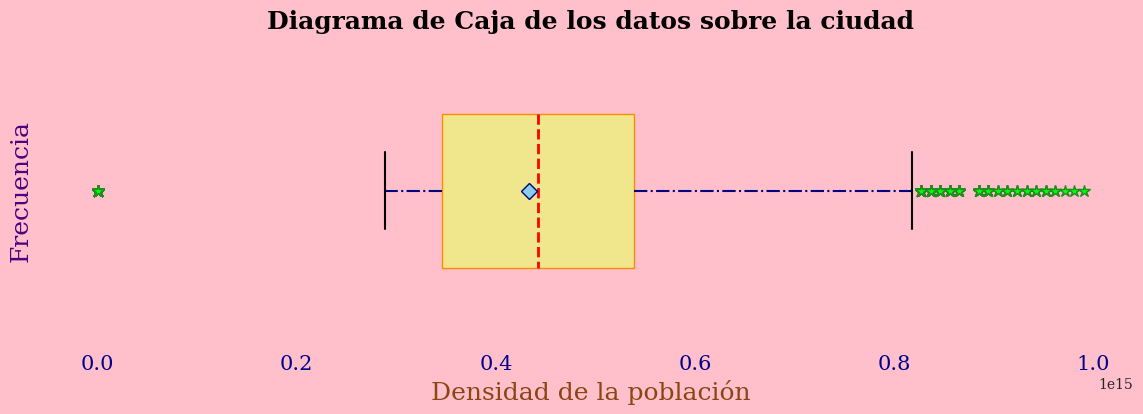

In [ ]:
#2)Dataframe del asegurado
# Creaamos la figura y ajustar el tamaño
# facecolor--> color  de fondo
plt.figure(figsize=(14,4), facecolor='pink')
#Ajustamos el estilo del gráfico
sns.set_style("white")
#plt.rcParams['font.family']-->Tipo de letra para el gráfico
plt.rcParams['font.family'] = 'DejaVu Serif'
# Creamos el diagrama de caja
#datos=df_ci--> datos para hacer el diagrama
#x='population_density'-->variable sobre la que se hace el diagrama de caja
#dict(facecolor='red', color='khaki'), -->  color de la caja
#whiskerprops=dict(color='navy'),--> Lineas horizontales
#capprops=dict(color='black'),--> Lineas verticales
#flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
#width=0.5 -->Largo de la caja
#showmeans=True-->Muestra la media
#medianprops=dict(color='red')--> Mediana
#meanprops=dict(marker='D', markersize=8,)-->Media
grafica= sns.boxplot(data=df_a, x='age_of_policyholder',showmeans=True, width=0.5,
#Colores dela caja
            boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
#Lineas verticales
            whiskerprops=dict(color='navy',linewidth=1.5,linestyle='dashdot'),
#Lineas horizontales
            capprops=dict(color='black',linewidth=1.5,linestyle='solid'),
#Valores atípicos
            flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                            markeredgecolor='forestgreen'),
#Mostrar la mediana
            medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
#Mostrar la media
            meanprops=dict(marker='D', markersize=8,
                           markerfacecolor='skyblue', markeredgecolor='navy')
            )
# Eliminar bordes de la gráfica
#Borde superior
plt.gca().spines['top'].set_visible(False)
#Borde derecho
plt.gca().spines['right'].set_visible(False)
#Borde izquierdo
plt.gca().spines['left'].set_visible(False)
#Borde inferior
plt.gca().spines['bottom'].set_visible(False)

# facecolor-->' color  de fondo
grafica.set_facecolor('pink')
# Agregamos el título
#fontweight='bold'-->Negritas
plt.title('Diagrama de Caja de los datos sobre la ciudad',
          fontsize=18, color='black', fontweight='bold')
#Agregamos las etiquetas de los valores del eje X
plt.xticks(fontsize=15, color='darkblue')
# Etiquetamos los ejes
plt.xlabel('Densidad de la población', fontsize=18, color='saddlebrown')
plt.ylabel('Frecuencia', fontsize=18, color='indigo')
# Mostramos el gráfico
plt.show()

**#2)Dataframe del asegurado**

In [ ]:
#3)Dataframe del carro
df_cnumericas= df_c.select_dtypes(include=['int64','float64']).columns.tolist()
df_cnumericas

['age_of_car',
 'make',
 'airbags',
 'displacement',
 'cylinder',
 'gear_box',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight',
 'ncap_rating']

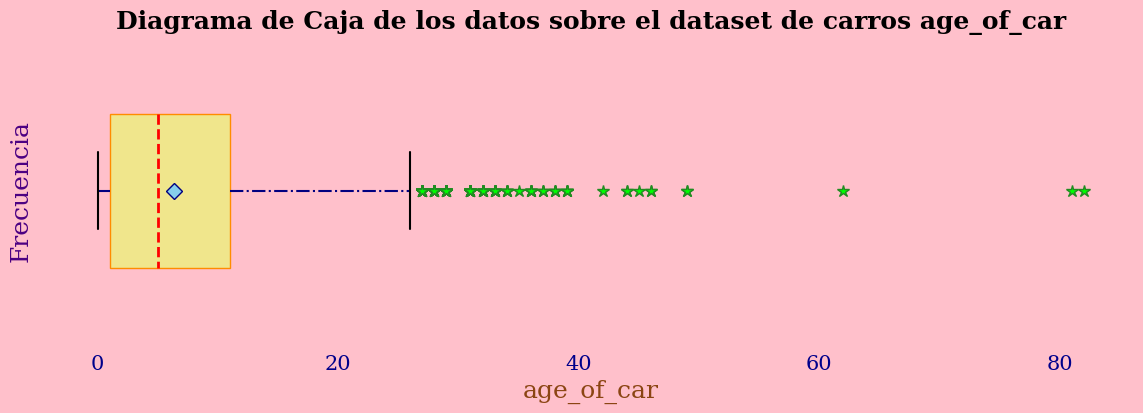

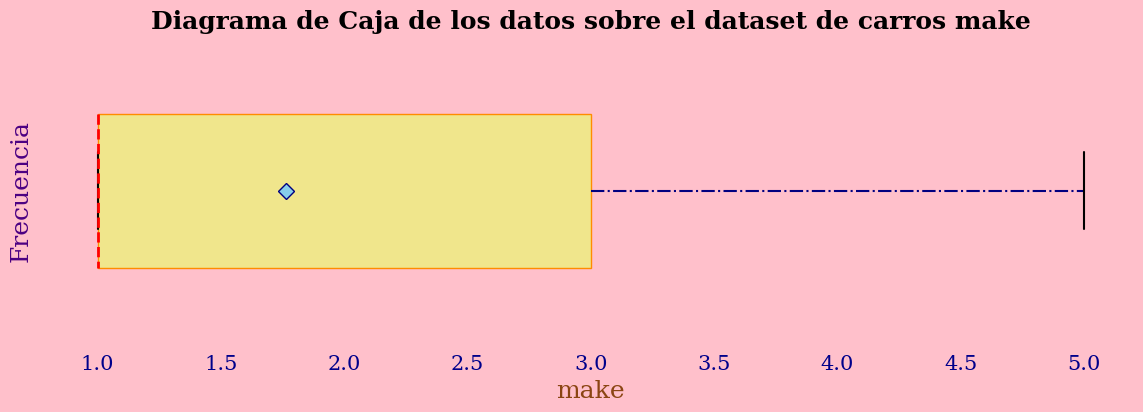

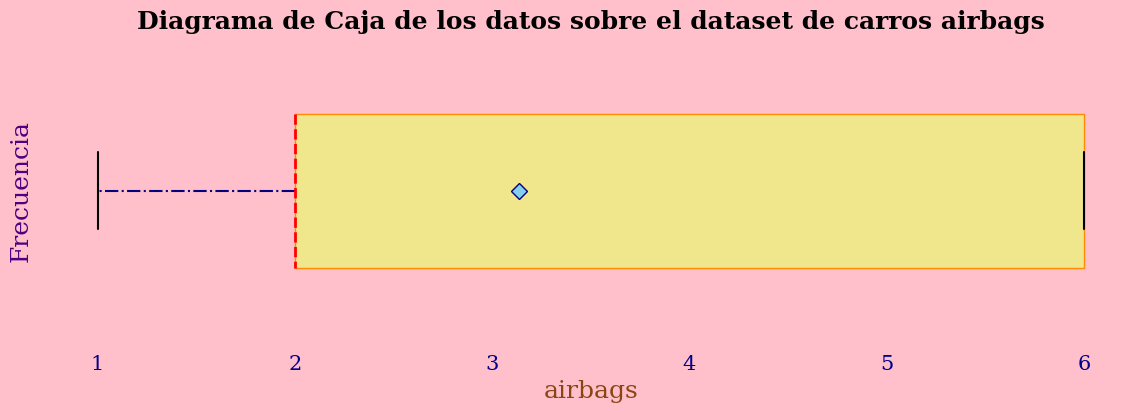

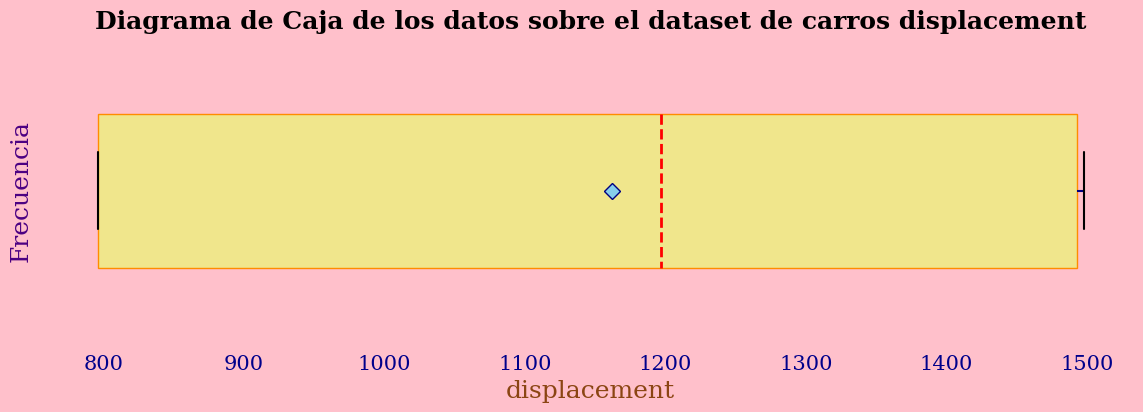

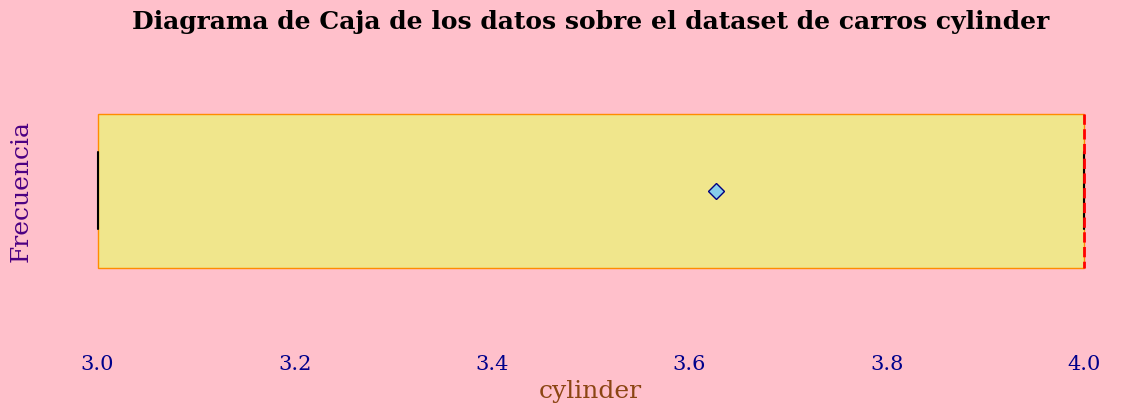

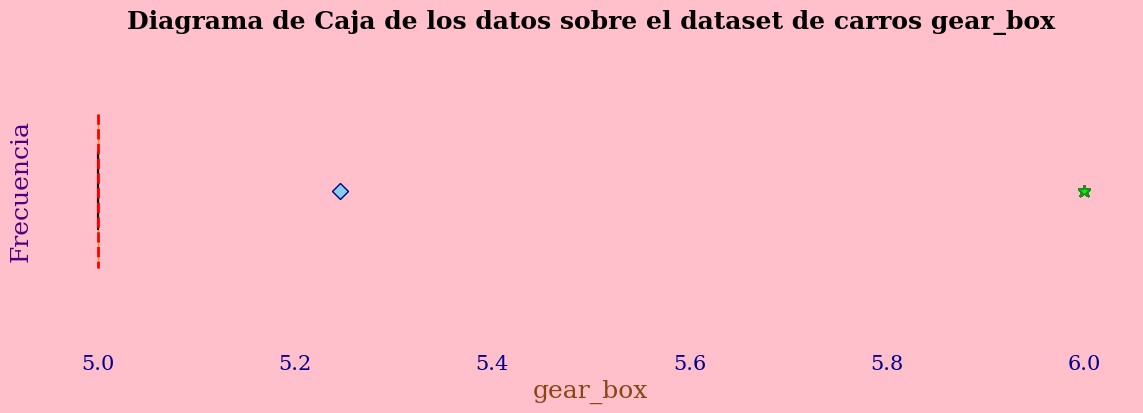

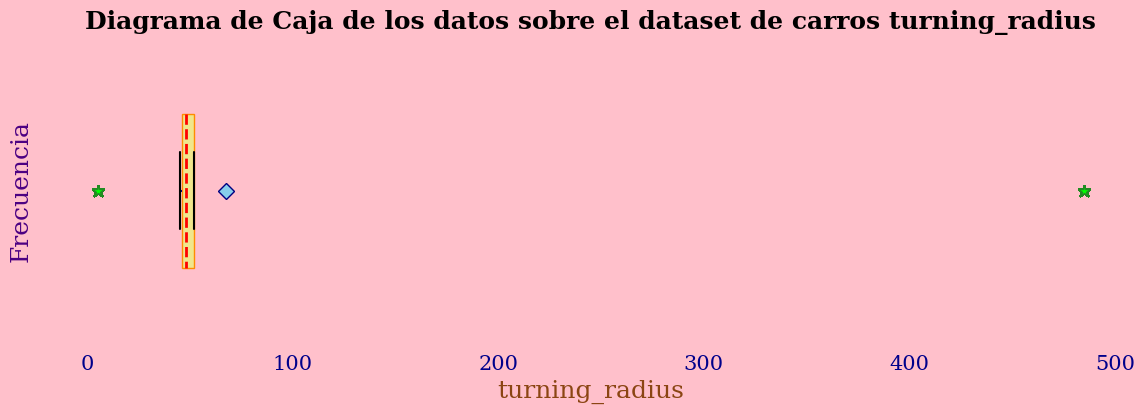

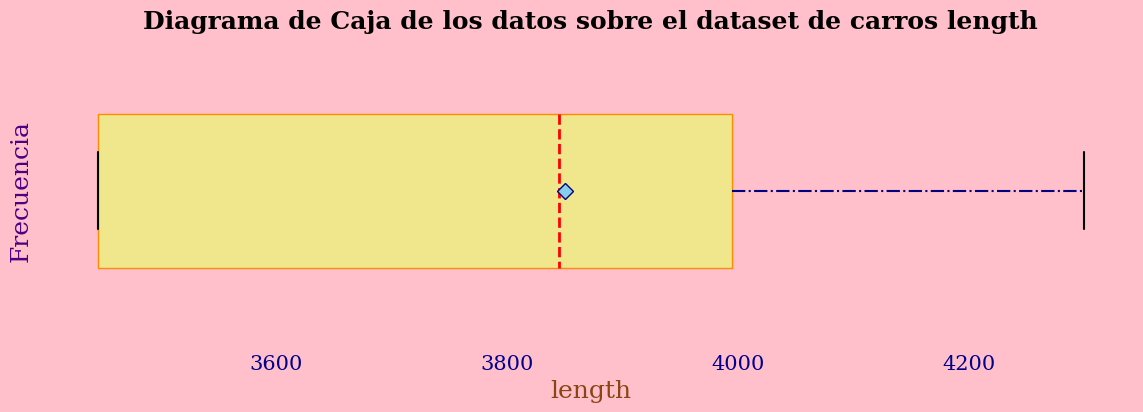

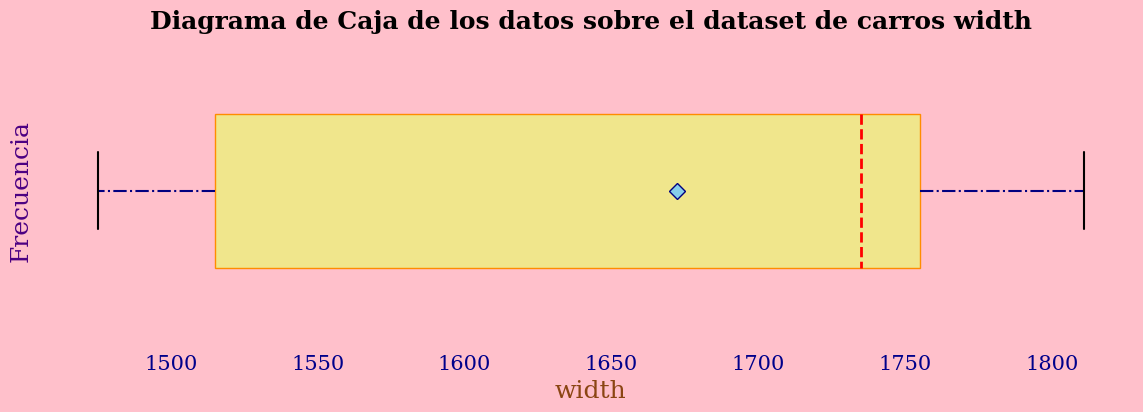

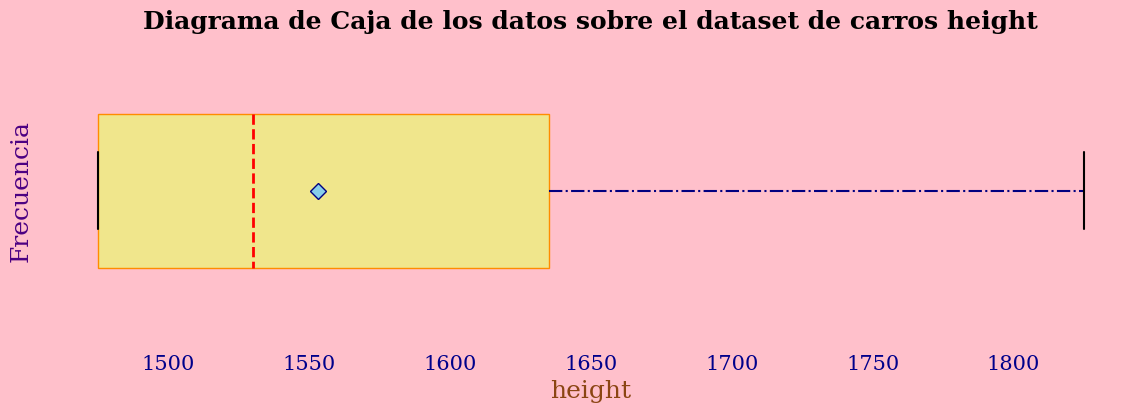

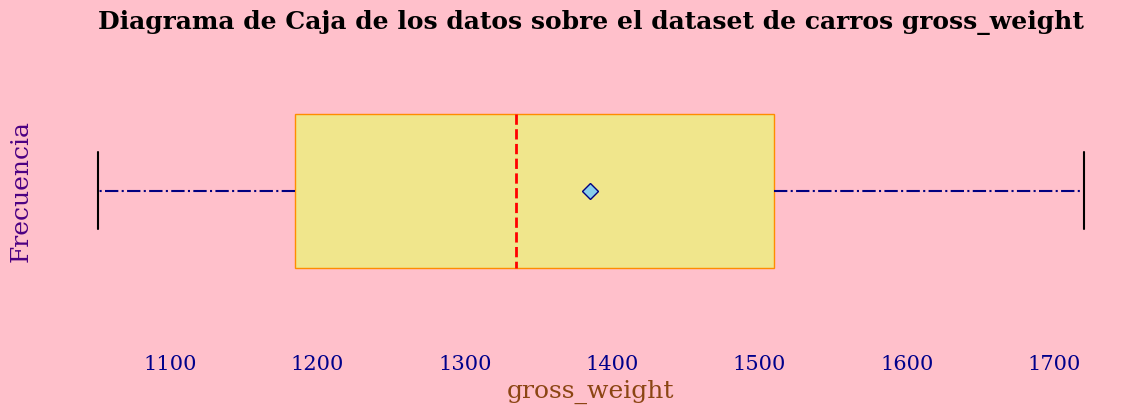

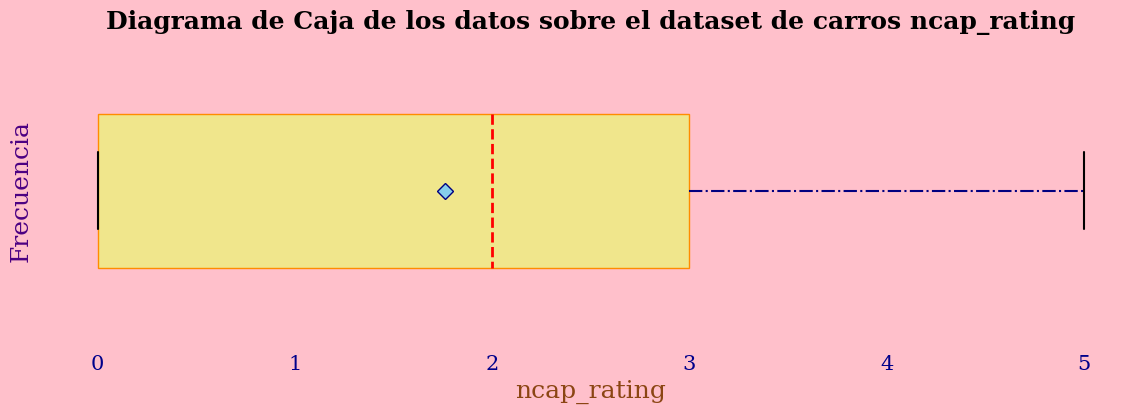

In [ ]:
for i in df_cnumericas:
  #2)Dataframe del asegurado
  # Creaamos la figura y ajustar el tamaño
  # facecolor--> color  de fondo
  plt.figure(figsize=(14,4), facecolor='pink')
  #Ajustamos el estilo del gráfico
  sns.set_style("white")
  #plt.rcParams['font.family']-->Tipo de letra para el gráfico
  plt.rcParams['font.family'] = 'DejaVu Serif'
  # Creamos el diagrama de caja
  #datos=df_ci--> datos para hacer el diagrama
  #x='population_density'-->variable sobre la que se hace el diagrama de caja
  #dict(facecolor='red', color='khaki'), -->  color de la caja
  #whiskerprops=dict(color='navy'),--> Lineas horizontales
  #capprops=dict(color='black'),--> Lineas verticales
  #flierprops=dict(markerfacecolor='lime', markeredgecolor='forestgreen'--> Valores atípicos
  #width=0.5 -->Largo de la caja
  #showmeans=True-->Muestra la media
  #medianprops=dict(color='red')--> Mediana
  #meanprops=dict(marker='D', markersize=8,)-->Media
  grafica= sns.boxplot(data=df_c, x=df_c[i],showmeans=True, width=0.5,
  #Colores dela caja
              boxprops=dict(facecolor='khaki', edgecolor='darkorange'),
  #Lineas verticales
              whiskerprops=dict(color='navy',linewidth=1.5,linestyle='dashdot'),
  #Lineas horizontales
              capprops=dict(color='black',linewidth=1.5,linestyle='solid'),
  #Valores atípicos
              flierprops=dict(marker='*', markersize=9,markerfacecolor='lime',
                              markeredgecolor='forestgreen'),
  #Mostrar la mediana
              medianprops=dict(color='red', linewidth=2,linestyle="dashed"),
  #Mostrar la media
              meanprops=dict(marker='D', markersize=8,
                            markerfacecolor='skyblue', markeredgecolor='navy')
              )
  # Eliminar bordes de la gráfica
  #Borde superior
  plt.gca().spines['top'].set_visible(False)
  #Borde derecho
  plt.gca().spines['right'].set_visible(False)
  #Borde izquierdo
  plt.gca().spines['left'].set_visible(False)
  #Borde inferior
  plt.gca().spines['bottom'].set_visible(False)

  # facecolor-->' color  de fondo
  grafica.set_facecolor('pink')
  # Agregamos el título
  #fontweight='bold'-->Negritas
  plt.title(f'Diagrama de Caja de los datos sobre el dataset de carros {i}',
            fontsize=18, color='black', fontweight='bold')
  #Agregamos las etiquetas de los valores del eje X
  plt.xticks(fontsize=15, color='darkblue')
  # Etiquetamos los ejes
  plt.xlabel(i, fontsize=18, color='saddlebrown')
  plt.ylabel('Frecuencia', fontsize=18, color='indigo')
  # Mostramos el gráfico
  plt.show()

**#3)Dataframe del carro**

---
## **Conversión a variables númericas** 🔢
---

**Nota 1**: El dataframe $0)$ (df_i) No se convirtió en variables numéricas por que es insignificante para realizar el modelo

**Nota 2**: El dataframe  $2)$ (df_a)Ya tiene todas sus variables numéricas

In [ ]:
#3)Dataframe sobre el carro
#Reemplazar los valores de "No" por 0 y de "Yes" por 1
df_c = df_c.replace({'No': 0, 'Yes': 1})

<ipython-input-31-fcc0a8e871ae>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c = df_c.replace({'No': 0, 'Yes': 1})


In [ ]:
#Mostrar los datos
df_c.head(5)

,age_of_car,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,5,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0
3,11,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,48,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2
4,11,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2


In [ ]:
#Corroborar las variables se conviriteron en numéricas
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   age_of_car                        58592 non-null  int64 
 1   make                              58592 non-null  int64 
 2   segment                           58592 non-null  object
 3   model                             58592 non-null  object
 4   fuel_type                         58592 non-null  object
 5   max_torque                        58592 non-null  object
 6   max_power                         58592 non-null  object
 7   engine_type                       58592 non-null  object
 8   airbags                           58592 non-null  int64 
 9   is_esc                            58592 non-null  int64 
 10  is_adjustable_steering            58592 non-null  int64 
 11  is_tpms                           58592 non-null  int64 
 12  is_parking_sensors

In [ ]:
#Crear un dataframe con las variables que aún no son numéricas
df_o=df[['segment','model','fuel_type','max_torque','max_power','engine_type','rear_brakes_type','transmission_type','steering_type']]
#Mostrar las 5 primeras filas del dataframe
df_o.head(5)


,segment,model,fuel_type,max_torque,max_power,engine_type,rear_brakes_type,transmission_type,steering_type
0,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
2,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,Drum,Manual,Power
3,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,Drum,Automatic,Electric
4,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,Drum,Automatic,Electric


Análisis individual para cada variable

**transmission_type** Es el tipo de transmisión que tiene el auto Solo tiene $2$ opciones Automatic o Manual por lo que podemos asignarle $0:=$"Automatic" y $1:=$"Manual"

**rear_brakes_type** Es el tipo de frenos traseros que usa el auto y solo tiene $2$ opciones Drum (Tambor / Batería) o Disc (Disco) por lo que podemos asignarle $0:=$"Drum" y $1:=$"Disc"

In [ ]:
#3)Dataframe sobre el carro
#Reemplazar valores de "Automatic" por 0 y de "Manual" por 1
df_c = df_c.replace({'Automatic': 0, 'Manual': 1})

<ipython-input-35-8279751ec5c4>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c = df_c.replace({'Automatic': 0, 'Manual': 1})


In [ ]:
#3)Dataframe sobre el carro
#Reemplazamos los valores de "Drum" por 0 y de "Disc" por 1
df_c = df_c.replace({'Drum': 0, 'Disc': 1})

<ipython-input-36-f86208a11af4>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_c = df_c.replace({'Drum': 0, 'Disc': 1})


In [ ]:
#Mostrar las variables convertidas a numéricas
df_c[['transmission_type','rear_brakes_type']].head(5)

,transmission_type,rear_brakes_type
0,1,0
1,1,0
2,1,0
3,0,0
4,0,0


In [ ]:
#Renombrar columnas
#'transmission_type'='is_transmission_type_manual'
#'rear_brakes_type'='is_rear_brakes_type_disc'
df_c = df_c.rename(columns={'transmission_type':'is_transmission_type_manual',
                            'rear_brakes_type': 'is_rear_brakes_type_disc'})

¿Como las convertimos las 6 variables restantes (steering_type,engine_type,model,max_power,max_torque,fuel_type,model,segment) en variables numéricas?

**Solución**:Usar variables dummys


---
### **Variables categóricas a variables númericas mediante variables dummies**💎
---

Las **variables dummies** surgen del problema de tener variables categóricas que se requieren usar en modelos de regresión por ejemplo pensemos en una varibles $E :=$ que es la estación del año (Primavera, verano, otoño e invierno)

¿Cómo multiplicamos o sumamos a la variable $E$ con su parametro $\beta$ ?
Es claro que no podemos hacer $5*$(otoño) ó $34+$invierno para obtener variables númericas ocupamos las variables dummies su función principal es convertir categorías cualitativas en valores numéricas (generalmente $0$ y $1$)

Por ejemplo para el sexo de una persona tenemos 2 variables dummies

$D_1=1$ Si es "Hombre", $0$ otro caso

$D_2=1$ Si es "Mujer", $0$ otro caso



**Nota importante**: Para evitar **colinealidad** y que no se cumplan los supuestos del modelo de regresión se debe usar $n-1$ variables dummies, es decir si tenemos $2$ categorías ("Hombre" y "Mujer") solo se programan $1$ variable dummy, si tenemos $4$ categorías ("Primavera","Verano","Otoño" e "Invierno") se programan $3$ variables dummies ya que la restante se puede inferir y ponerla causa problemas de multicolinealidad

**Ejemplo** para la variable 'steering_type' que tiene 3 categorías ('Power', 'Electric' y 'Manual'), se tienen 3 variables dummies pero únicamente se ocupan 2

$D_1=1$ Si es "Power", $0$ otro caso

$D_2=1$ Si es "Electric",$0$ otro caso

$D_3=1$ Si es "Manual", $0$ otro caso


**pd.get_dummies(df, columns=[$x$], drop_first=True)** Convierte en variables dummies la columna $x$ del dataframe 'df' y elimina la colinealidad con drop_first=True

In [ ]:
# Convertir las variables categóricas en variables dummy
#df_cd = Data frame para las variables del carro con variables dummies
#pd.get_dummies <--lo convierte con variables dummies
#df_c, -->Datos
#columns=->Columnas que se convertiran en dummies
#drop_first=True-->Elimina la colinealidad
df_cd = pd.get_dummies(df_c, columns=['steering_type','engine_type',
                                      'model','max_power',
                                      'max_torque','fuel_type',
                                      'model','segment'], drop_first=True)
#Mortrar las 5 filas del dataframe nuevo
df_cd.head(5)

,age_of_car,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_rear_brakes_type_disc,displacement,cylinder,is_transmission_type_manual,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,steering_type_Electric,steering_type_Power,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,fuel_type_Diesel,fuel_type_Petrol,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,5,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,11,1,2,1,1,0,1,1,0,1197,4,0,5,48,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False
4,11,2,2,0,0,0,0,1,0,999,3,0,5,5,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
#4)Dataframe sobre el carro-dummies
#Reemplazamos los valores de False por 0 y de True por 1
#Nota se eliminan las comillas ('') por que son valores booleanos no string
df_cd = df_cd.replace({False: 0, True: 1})
#Muestra las 5 filas del dataframe nuevo
df_cd.head(5)


<ipython-input-41-b9acc40bdd59>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cd = df_cd.replace({False: 0, True: 1})


,age_of_car,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_rear_brakes_type_disc,displacement,cylinder,is_transmission_type_manual,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,steering_type_Electric,steering_type_Power,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,fuel_type_Diesel,fuel_type_Petrol,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,5,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,1,2,1,1,0,1,1,0,1197,4,0,5,48,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,11,2,2,0,0,0,0,1,0,999,3,0,5,5,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Comprobar que todas las variables son numéricas
df_cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 86 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   age_of_car                             58592 non-null  int64
 1   make                                   58592 non-null  int64
 2   airbags                                58592 non-null  int64
 3   is_esc                                 58592 non-null  int64
 4   is_adjustable_steering                 58592 non-null  int64
 5   is_tpms                                58592 non-null  int64
 6   is_parking_sensors                     58592 non-null  int64
 7   is_parking_camera                      58592 non-null  int64
 8   is_rear_brakes_type_disc               58592 non-null  int64
 9   displacement                           58592 non-null  int64
 10  cylinder                               58592 non-null  int64
 11  is_transmission_type_manual 

In [ ]:
#1)Dataframe de ciudad
# Convertir las variables categóricas en variables dummy
#df_ci-->Datos
#pd.get_dummies--> Convertir variables en dummies
#columns-->Columnas que se convertiran en dummies
#drop_first=True-->Elimina la colinealidad

df_cid = pd.get_dummies(df_ci, columns=['area_cluster'],
                        drop_first=True)
#Mostrar las 5 filas del dataframe nuevo
df_cid.head(5)

,population_density,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
0,4990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,27003,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,4076,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,21622,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,34738,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
#5)Dataframe sobre el ciudad-dummies
#Reemplazar los valores de False por 0 y de True por 1
#Nota se eliminan las comillas ('') por que son valores booleanos no string
df_cid = df_cid.replace({False: 0, True: 1})
#Mmostrar las 5 filas del dataframe nuevo
df_cid.head(5)

<ipython-input-44-7c8b65c16af8>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cid = df_cid.replace({False: 0, True: 1})


,population_density,area_cluster_C10,area_cluster_C11,area_cluster_C12,area_cluster_C13,area_cluster_C14,area_cluster_C15,area_cluster_C16,area_cluster_C17,area_cluster_C18,area_cluster_C19,area_cluster_C2,area_cluster_C20,area_cluster_C21,area_cluster_C22,area_cluster_C3,area_cluster_C4,area_cluster_C5,area_cluster_C6,area_cluster_C7,area_cluster_C8,area_cluster_C9
0,4990,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,27003,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,4076,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,21622,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,34738,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
#Comprobar que todas las variables son numéricas
df_cid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   population_density  58592 non-null  int64
 1   area_cluster_C10    58592 non-null  int64
 2   area_cluster_C11    58592 non-null  int64
 3   area_cluster_C12    58592 non-null  int64
 4   area_cluster_C13    58592 non-null  int64
 5   area_cluster_C14    58592 non-null  int64
 6   area_cluster_C15    58592 non-null  int64
 7   area_cluster_C16    58592 non-null  int64
 8   area_cluster_C17    58592 non-null  int64
 9   area_cluster_C18    58592 non-null  int64
 10  area_cluster_C19    58592 non-null  int64
 11  area_cluster_C2     58592 non-null  int64
 12  area_cluster_C20    58592 non-null  int64
 13  area_cluster_C21    58592 non-null  int64
 14  area_cluster_C22    58592 non-null  int64
 15  area_cluster_C3     58592 non-null  int64
 16  area_cluster_C4     58592 non-null  int6

---
# **Modelo de regresión logística con Scikit-learn** 🧠
---

In [ ]:
#de=Data frame de datos entrenar
de=df_cd.copy()
#Mostramos las 5 primeras filas del dataframe
de.head(5)


,age_of_car,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_rear_brakes_type_disc,displacement,cylinder,is_transmission_type_manual,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,steering_type_Electric,steering_type_Power,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,fuel_type_Diesel,fuel_type_Petrol,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
0,5,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1,2,0,0,0,1,0,0,796,3,1,5,46,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,11,1,2,1,1,0,1,1,0,1197,4,0,5,48,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,11,2,2,0,0,0,0,1,0,999,3,0,5,5,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Mostramos las medidas estadísticas del dataframe de
de.describe()

,age_of_car,make,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,is_rear_brakes_type_disc,displacement,cylinder,is_transmission_type_manual,gear_box,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,steering_type_Electric,steering_type_Power,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,max_power_118.36bhp@5500rpm,max_power_40.36bhp@6000rpm,max_power_55.92bhp@5300rpm,max_power_61.68bhp@6000rpm,max_power_67.06bhp@5500rpm,max_power_88.50bhp@6000rpm,max_power_88.77bhp@4000rpm,max_power_97.89bhp@3600rpm,max_torque_170Nm@4000rpm,max_torque_200Nm@1750rpm,max_torque_200Nm@3000rpm,max_torque_250Nm@2750rpm,max_torque_60Nm@3500rpm,max_torque_82.1Nm@3400rpm,max_torque_85Nm@3000rpm,max_torque_91Nm@4250rpm,fuel_type_Diesel,fuel_type_Petrol,model_M10,model_M11,model_M2,model_M3,model_M4,model_M5,model_M6,model_M7,model_M8,model_M9,segment_B1,segment_B2,segment_C1,segment_C2,segment_Utility
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000
mean,6.354673,1.763722,3.137066,0.314053,0.606329,0.239248,0.959500,0.390634,0.239248,1162.355851,3.626963,0.651642,5.245443,67.381588,3850.476891,1672.233667,1553.33537,1385.276813,0.579055,0.289425,0.289425,0.350133,0.549171,0.724246,0.724246,0.979366,0.585251,0.380308,0.724246,0.993805,1.759950,0.407581,0.571785,0.050177,0.018433,0.239248,0.027273,0.006195,0.255120,0.020634,0.235117,0.071221,0.036080,0.020634,0.006195,0.018433,0.040500,0.239248,0.027273,0.235117,0.050177,0.071221,0.036080,0.006195,0.255120,0.071221,0.020634,0.040500,0.303727,0.027273,0.036080,0.006195,0.036080,0.027273,0.239248,0.255120,0.071221,0.020634,0.040500,0.302601,0.350423,0.020634,0.006195,0.018433,0.040500,0.239248,0.027273,0.235117,0.050177,0.071221,0.036080,0.071221,0.312568,0.060708,0.239248,0.020634
std,5.636646,1.136988,1.832641,0.464142,0.488568,0.426628,0.197131,0.487897,0.426628,266.304786,0.483616,0.476454,0.430353,96.630073,311.457119,112.089135,79.62227,212.423085,0.493715,0.453499,0.453499,0.477016,0.497581,0.446897,0.446897,0.142158,0.492683,0.485467,0.446897,0.078467,1.389576,0.491389,0.494824,0.218313,0.134511,0.426628,0.162880,0.078467,0.435932,0.142158,0.424076,0.257196,0.186491,0.142158,0.078467,0.134511,0.197131,0.426628,0.162880,0.424076,0.218313,0.257196,0.186491,0.078467,0.435932,0.257196,0.142158,0.197131,0.459870,0.162880,0.186491,0.078467,0.18649

---
## **Entrenamiento del modelo** 💪
---

---
## **Métricas del modelo** ♾️
---

---
## **Matriz de confusión**🕵️
---

---
## **Curva ROC**📊
---

---
# **Modelo de regresión logística con Statsmodels** 📈
---

---
## **Entrenamiento del modelo** 💪
---

---
## **Métricas del modelo** ♾️
---

---
## **Matriz de confusión**🕵️
---

---
## **Curva ROC**📊
---

---
# **Conclusiones**📌
---

Codigo elaborado por Morales Francisco [LinkedIn](https://www.linkedin.com/in/francisco-morales-actuario/)

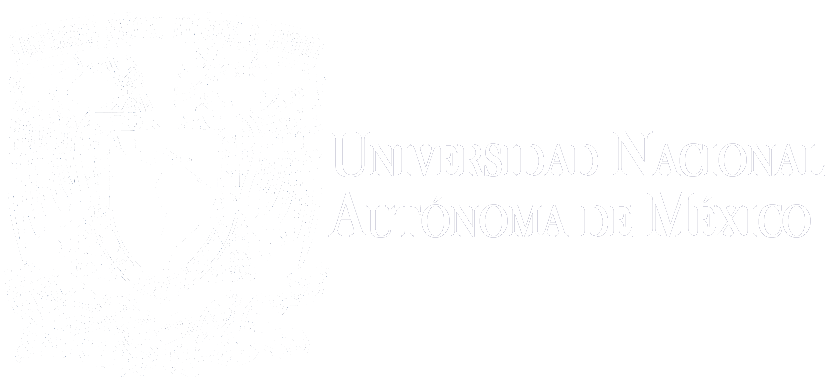